In [318]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV


In [319]:
column_names = ['class',
                'cap-shape',
                'cap-surface',
                'cap-color',
                'bruises',
                'odor',
                'gill-attachment',
                'gill-spacing',
                'gill-size',
                'gill-color',
                'stalk-shape',
                'stalk-root',
                'stalk-surface-above-ring',
                'stalk-surface-below-ring',
                'stalk-color-above-ring',
                'stalk-color-below-ring',
                'veil-type',
                'veil-color',
                'ring-number',
                'ring-type',
                'spore-print-color',
                'population',
                'habitat']

data = pd.read_csv('C:/Users/rain/Desktop/agaricus-lepiota.data',header=None,names=column_names)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [321]:
def make_categorical(data, columns):
    
    for column in columns:
        data[column] = pd.Categorical(data[column])
    return data

columns = data.columns
data = make_categorical(data, columns)

In [322]:
data.shape

(8124, 23)

<AxesSubplot:xlabel='class', ylabel='odor'>

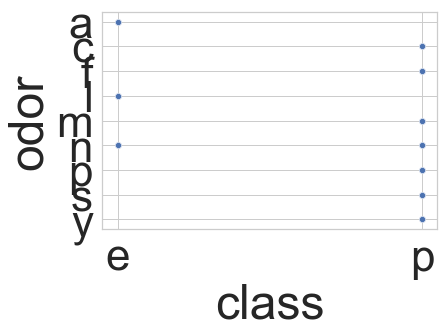

In [343]:
sns.scatterplot(x="class", y="odor", palette='mako', data=data)

In [336]:
def label_encode_fit(data, columns):
    result = data.copy()
    encoders = {}
    for column in columns:
        encoder = preprocessing.LabelEncoder()
        result[column] = encoder.fit_transform(result[column])
        encoders[column] = encoder
    return result, encoders

data1, encoders1 = label_encode_fit(data,data.columns)

In [337]:
def correlation_map(data, method):
    
    
    corr = data.corr(method)
    ix = corr.sort_values('class', ascending=False).index
    df_sorted_by_correlation = data.loc[:, ix]
    
    corr = df_sorted_by_correlation.corr(method)
    plt.subplots(figsize=(18,14))
    with sns.axes_style("white"):
        # display a correlation heatmap
        ax = sns.heatmap(corr, annot=True)
    plt.show()

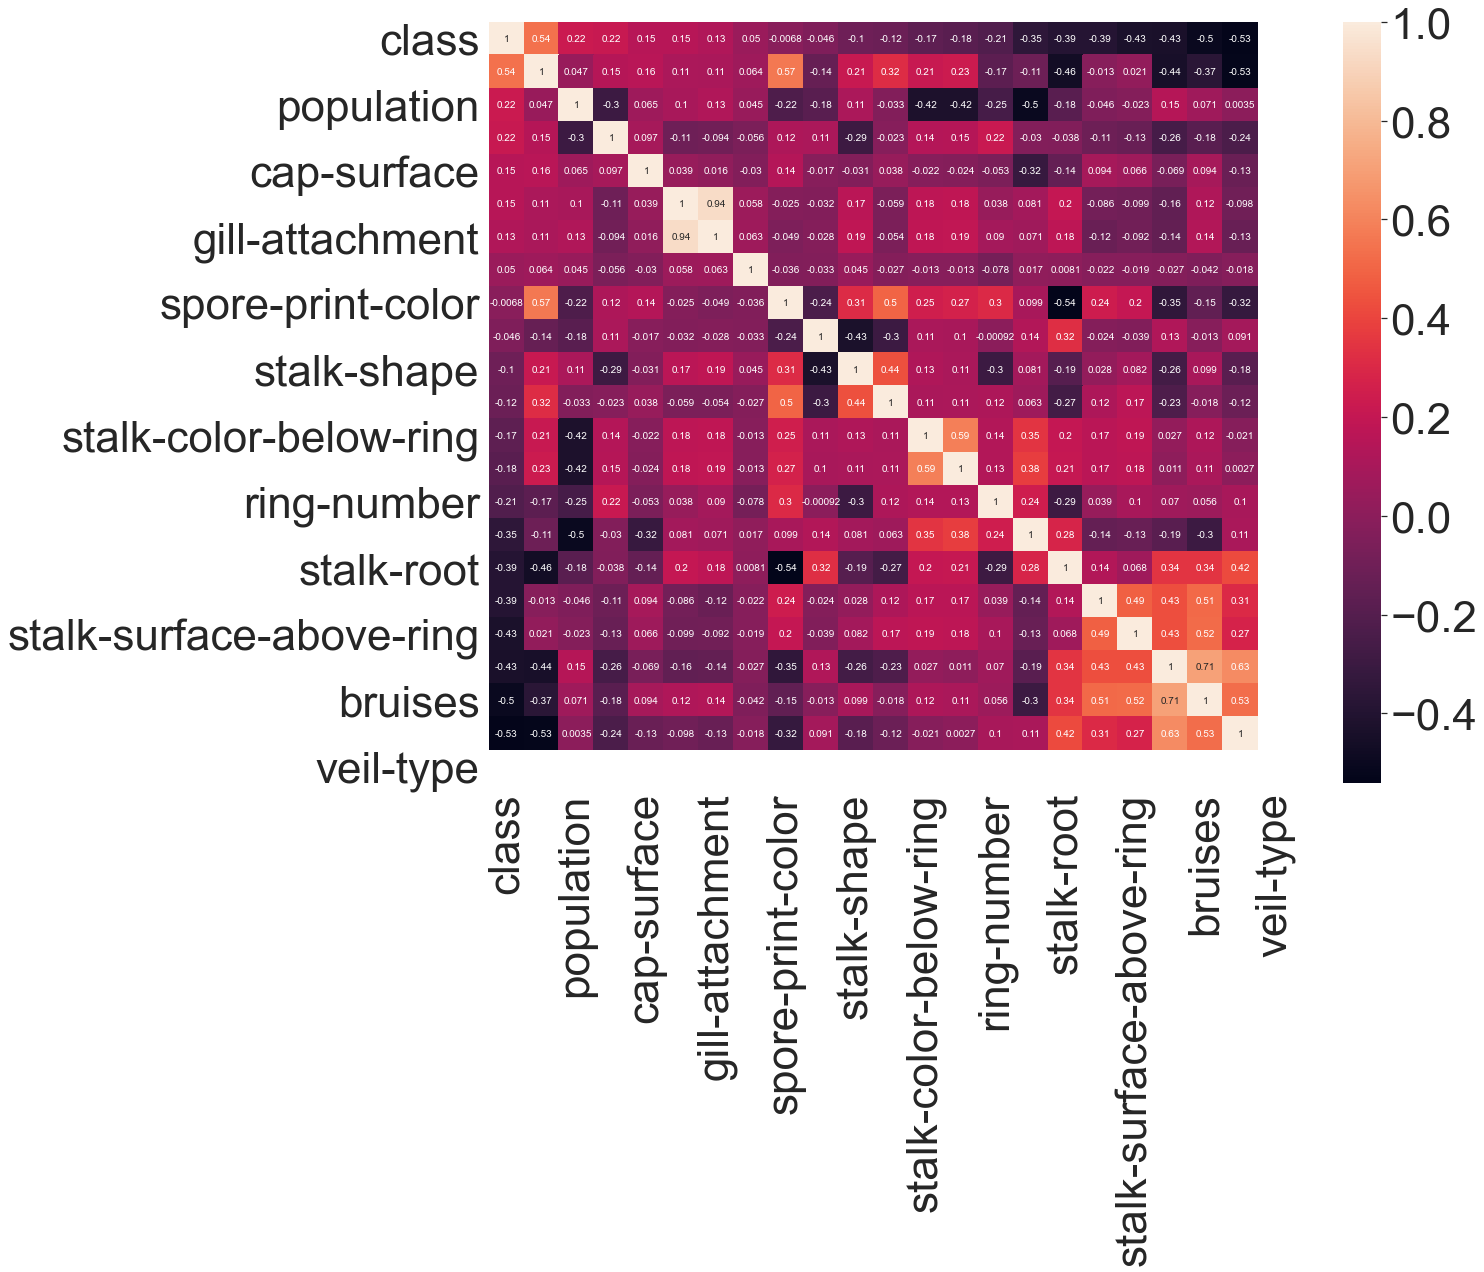

In [344]:
correlation_map(data1, method="spearman")

In [381]:
#Gill_size should be included to the model as it has the highest correlation to class.
#Highly correlated variables such as, gill-color & ring-type, bruises & stalk-surface-below-ring 
#can be discarded to obtain more accurate results. It has nothing to do with Class.

In [398]:
mappings = list()

encoder = LabelEncoder()

for column in range(len(data.columns)) : 
    data[data.columns[column]] = encoder.fit_transform(data[data.columns[column]])
    mappings_dict = {index: label for index, label in enumerate (encoder.classes_)}
    mappings.append(mappings_dict)
    
Y = data['class']
X = data.drop('class', axis = 1)
X = data.drop('bruises', axis = 1)
X = data.drop('gill-color', axis = 1)
X = data.drop('ring-type', axis = 1)
X = data.drop('stalk-surface-below-ring', axis = 1)

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)


X_train, X_test, Y_train , Y_test = train_test_split(X, Y , train_size = 0.8 )

In [399]:
log_model = LogisticRegression( )
svm_model = SVC( C = 1, kernel = 'rbf')
nn_model = MLPClassifier(hidden_layer_sizes= (128, 128))
np.sum(Y)/len(Y)

0.48202855736090594

In [400]:
log_model.fit(X_train , Y_train)
svm_model.fit(X_train , Y_train)
nn_model.fit(X_train , Y_train)

MLPClassifier(hidden_layer_sizes=(128, 128))

In [401]:
print(f"--- Logistic Regression: {log_model.score(X_test,Y_test)}")
print(f"Support Vector Machine : {svm_model.score(X_test,Y_test)}")
print(f"--------Neural Network : {nn_model.score(X_test,Y_test)}")

--- Logistic Regression: 1.0
Support Vector Machine : 1.0
--------Neural Network : 1.0
